# 10장_케라스를_사용한_인공신경망_소개

1. 수백만 개의 이미지 분류
2. 음성 인식 서비스의 성능 높이기
3. 좋은 비디오 추천
4. 수백만 개의 기보를 익히고 자기 자신과 게임하면서 학습하는 알파고

<다룰 내용>
- 다층 퍼셉트론
- 케라스 API를 사용하여 인공 신경망 구현하는 방법


## 10.1 생물학적 뉴런에서 인공 뉴런까지
인공 신경망이 우리 생활에 커다란 영향을 준다는 근거
1. 훈련하기 위한 데이터가 매우 많아짐
2. 하드웨어 크게 발전, 클라우드 플랫폼 등장
3. 훈련 알고리즘 향상
3. 지역 최적점에 도달하더라고 일반적으로 전역 최적점에 매우 가깝다.
4. 인공 신경망을 기반으로한 기술들이 계속해서 향상될 것이다.

### 퍼셉트론
- 가장 간단한 인공 신경망 구조 중 하나
- 입력, 출력이 어떤 숫자이고, 각각의 입력 연결은 가중치와 연관되어 있다.
- 입력의 가중치 합을 계산한 뒤 계산된 합에 step function을 적용하여 결과 출력한다.
- 
image.png
- 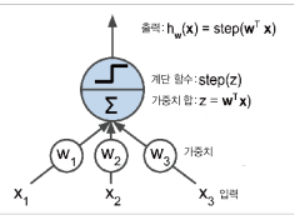

- 완전 연결 층(밀집 층): 한 층에 있는 모든 뉴런이 이전 층의 모든 뉴런과 연결되어 있을 때
- 입력층: 모두 입력 뉴런으로 구성됨, 편향 특성이 더해진다.
- 입력 2개와 출력 3개로 구성된 퍼셉트론
  - 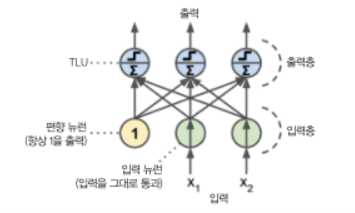
- 헤브의 규칙: 퍼셉트론의 훈련 알고리즘
- 퍼셉트론 학습 규칙
  - 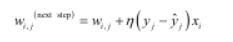
- 퍼셉트론 수렴 이론: 훈련 샘플이 선형적으로 구분될 수 있다면 알고리즘이 정답에 수렴한다.

In [ ]:
# Perceptron 클래스 제공
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)] # 꽃잎의 길이와 너비
y = (iris.target == 0).astype(np.int) # 부채붓꽃(iris setosa)인가?

per_clf = Perceptron()
per_clf.fit(X,y)

y_pred = per_clf.predict([[2, 0.5]])

<ipython-input-2-4d77ef44d33c>:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int) # 부채붓꽃(iris setosa)인가?


- 로지스틱 회귀 분류기 vs 퍼셉트론 => 로지스틱 회귀
- 퍼셉트론은 클래스 확률을 제공하지 않으며 고정된 임곗값을 기준으로 예측을 만든다.

- 다층 퍼셉트론
  - 퍼셉트론을 여러 개 쌓아 올린 것
  - XOR 문제를 풀 수 있다.
  - 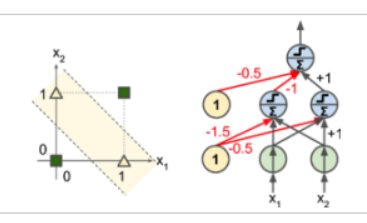

### 다층 퍼셉트론과 역전파
- 입력층, 은닉층, 출력층
- 출력층을 제외하고 모든 층은 편향 뉴런을 포함하며 완전 연결되어있다.
- FNN: 입력에서 출력으로 한 방향으로만 흐른다.
- 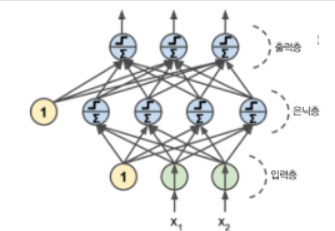


- 심층 신경망(DNN, 딥러닝): 은닉층을 여러 개 쌓아 올린 인공 신경망
- 역전파: 정방향 한 번, 역방향 한 번 통과하는 것만으로 모든 모델 파라미터에 대한 네트워크 오차의 그래디언트를 계산할 수 있다.
- 그래디언트를 구하고 나면 평범한 경사 하강법을 수행한다.
- 알고리즘
  - 정방향 계산: 중간 계산값 모두 저장
  - 오차 측정, 
  - 역방향 계산: 역방향으로 각 층을 거치면서 각 연결이 오차에 기여한 정도를 측정 (연쇄 법칙 적용)
  - 이 오차가 감소하도록 가중치를 조정
- 계단 함수를 시그모이드 함수 or 탄젠트 함수 or ReLU 함수로 바꿈
- 활성화 함수가 필요한 이유: 선형 변환을 여러 개 연결하기 위해서 층 사이에 비선형성 추가해줘야한다.



### 회귀를 통한 다층 퍼셉트론
- 값 하나 예측하는 데에 출력 뉴런 하나만 필요
- softplus 활성화 함수: ReLU의 변종, z가 음수일 때 0에 가까워지고 큰 양수일 수록 z에 가깝다.
- 어떤 범위 안의 값을 예측하고 싶다 => 로지스틱 함수(0~1) or 탄젠트 함수(-1~1)
- 손실 함수: 평균 제곱 오차 MSE, 이상치가 많으면 평균 절댓값 오차 사용, 또는 Huber 손실 사용
- 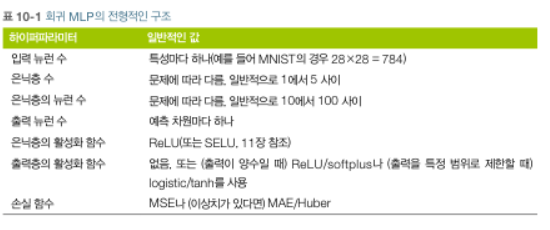

### 분류를 위한 다층 퍼셉트론
- 이진 분류 문제: 로지스틱 함수를 가진 하나의 출력 뉴런만 필요, 양성 클래스에 대한 예측
- 다중 레이블 이진 분류 문제 (스팸 or not, 긴급 or not)
  - 로지스틱 활성화 함수를 가진 여러 개의 출력 뉴런 필요, 합이 1이 될 필요 없음
- 다중 분류
  3개 이상의 클래스 중 한 클래스에만 속한다면, 클래스마다 하나의 출력 뉴런 필요함
  - 출력층: 소프트 맥스 활성화 함수 사용, 합이 1이 됨
  - 손실함수: 크로스 엔트로피 손실함수
- 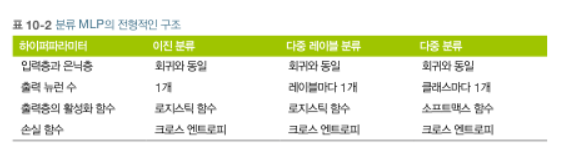

# 다음 중에 진행

## 10.2 케라스로 다층 퍼셉트론 구현하기

## 10.3 신경망 하이퍼파라미터

## 10.4 연습문제